Import required lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 

Uploading the files

In [2]:
from google.colab import files
files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'sample_submission.csv': b'Employee ID,Burn Rate\nfffe32003000360033003200,0.16\nfffe3700360033003500,0.36\nfffe31003300320037003900,0.49\nfffe32003400380032003900,0.2\nfffe31003900340031003600,0.52\n',
 'test.csv': b'Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score\nfffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7\nfffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2\nfffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9\nfffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6\nfffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4\nfffe3600390032003200,2008-09-19,Male,Product,No,3.0,5.0,6.5\nfffe3600370032003200,2008-01-16,Female,Service,Yes,2.0,3.0,4.7\nfffe32003900390030003000,2008-02-10,Male,Service,No,2.0,5.0,8.5\nfffe3100370031003000,2008-08-10,Male,Product,Yes,2.0,5.0,7.6\nfffe31003500320037003600,2008-05-20,Male,Product,Yes,2.0,5.0,5.7\nfffe340037

Reading the files

In [3]:
#Reading 
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')

In [4]:
def understand_dataset(df):
  print(df.shape)
  print(df.columns)
  print(df.head(10))
  print(df.tail(10))
  print(df.info())
  print(df.isnull().sum())
  print(df.describe())

In [5]:
understand_dataset(df)


(22750, 9)
Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')
                Employee ID Date of Joining  ... Mental Fatigue Score Burn Rate
0  fffe32003000360033003200      2008-09-30  ...                  3.8      0.16
1      fffe3700360033003500      2008-11-30  ...                  5.0      0.36
2  fffe31003300320037003900      2008-03-10  ...                  5.8      0.49
3  fffe32003400380032003900      2008-11-03  ...                  2.6      0.20
4  fffe31003900340031003600      2008-07-24  ...                  6.9      0.52
5      fffe3300350037003500      2008-11-26  ...                  3.6      0.29
6  fffe33003300340039003100      2008-01-02  ...                  7.9      0.62
7  fffe32003600320037003400      2008-10-31  ...                  4.4      0.33
8  fffe32003200300034003700      2008-12-27  ...                  N

In [6]:
understand_dataset(dt)

(12250, 8)
Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score'],
      dtype='object')
                Employee ID  ... Mental Fatigue Score
0  fffe31003300390039003000  ...                  7.7
1  fffe31003300310037003800  ...                  5.2
2  fffe33003400380035003900  ...                  5.9
3      fffe3100370039003200  ...                  4.6
4  fffe32003600390036003700  ...                  6.4
5      fffe3600390032003200  ...                  6.5
6      fffe3600370032003200  ...                  4.7
7  fffe32003900390030003000  ...                  8.5
8      fffe3100370031003000  ...                  7.6
9  fffe31003500320037003600  ...                  5.7

[10 rows x 8 columns]
                    Employee ID  ... Mental Fatigue Score
12240      fffe3500380037003100  ...                  5.3
12241  fffe31003700340032003700  ...                  7.5
12242  ff

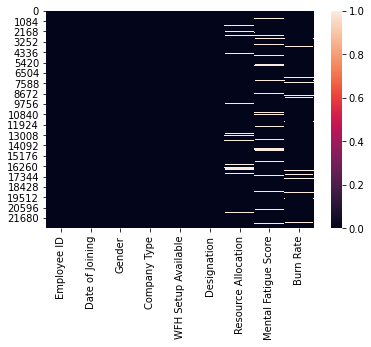

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.head()

Employee ID Date of Joining  ... Mental Fatigue Score Burn Rate
0  fffe32003000360033003200      2008-09-30  ...                  3.8      0.16
1      fffe3700360033003500      2008-11-30  ...                  5.0      0.36
2  fffe31003300320037003900      2008-03-10  ...                  5.8      0.49
3  fffe32003400380032003900      2008-11-03  ...                  2.6      0.20
4  fffe31003900340031003600      2008-07-24  ...                  6.9      0.52

[5 rows x 9 columns]

In [9]:
df.corr()

Designation  ...  Burn Rate
Designation              1.000000  ...   0.737556
Resource Allocation      0.878459  ...   0.856278
Mental Fatigue Score     0.690983  ...   0.944546
Burn Rate                0.737556  ...   1.000000

[4 rows x 4 columns]

In [10]:
df['Resource Allocation']

0        3.0
1        2.0
2        NaN
3        1.0
4        7.0
        ... 
22745    3.0
22746    6.0
22747    7.0
22748    5.0
22749    6.0
Name: Resource Allocation, Length: 22750, dtype: float64

In [11]:
df['Resource Allocation'].unique()

array([ 3.,  2., nan,  1.,  7.,  4.,  6.,  5.,  8., 10.,  9.])

In [12]:
df['Mental Fatigue Score']

0        3.8
1        5.0
2        5.8
3        2.6
4        6.9
        ... 
22745    NaN
22746    6.7
22747    NaN
22748    5.9
22749    7.8
Name: Mental Fatigue Score, Length: 22750, dtype: float64

In [13]:
df['Mental Fatigue Score'].unique()

array([ 3.8,  5. ,  5.8,  2.6,  6.9,  3.6,  7.9,  4.4,  nan,  5.3,  1.8,
        4.7,  5.9,  6.7,  4. ,  7.6,  6.3,  7.7,  6.6,  7.4,  3.9,  3. ,
        8.7,  7.3,  5.4,  6. ,  7.5, 10. ,  6.4,  5.1,  5.6,  6.1,  3.1,
        8. ,  6.8,  4.9,  9.2,  6.5,  6.2,  8.2,  4.1,  4.3,  0.8,  2.9,
        2. ,  9.1,  0. ,  5.7,  8.3,  5.5,  7. ,  3.3,  7.8,  7.2,  5.2,
        8.9,  4.5,  8.1,  8.6,  9.5,  3.5,  4.8,  2.4,  3.7,  1. ,  8.8,
        9.3,  4.6,  9.9,  0.5,  2.8,  9. ,  3.4,  4.2,  1.6,  2.7,  1.3,
        3.2,  8.4,  7.1,  9.4,  2.1,  9.7,  2.5,  1.9,  1.7,  9.6,  0.7,
        0.2,  1.2,  8.5,  9.8,  2.2,  1.1,  0.9,  2.3,  0.4,  1.4,  1.5,
        0.6,  0.3,  0.1])

In [14]:
df['Burn Rate']

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64

In [15]:
df['Burn Rate'].unique()

array([0.16, 0.36, 0.49, 0.2 , 0.52, 0.29, 0.62, 0.33, 0.56, 0.67, 0.5 ,
       0.12, 0.4 , 0.51, 0.32, 0.39, 0.59, 0.22, 0.68, 0.57, 0.47, 0.46,
       0.61, 0.91, 0.44, 0.6 , 0.45, 0.19, 0.31, 0.81, 0.42, 0.53,  nan,
       0.94, 0.37, 0.65, 0.38, 0.15, 0.26, 0.28, 0.71, 0.8 , 0.63, 0.79,
       0.72, 0.34, 0.27, 0.66, 0.04, 0.05, 0.11, 0.41, 0.76, 0.43, 0.85,
       0.35, 0.  , 0.55, 0.48, 0.7 , 0.18, 0.23, 0.25, 0.75, 0.1 , 0.73,
       0.58, 0.88, 0.77, 0.3 , 0.06, 0.03, 0.69, 0.24, 0.74, 0.86, 0.92,
       0.78, 0.21, 0.98, 0.02, 0.82, 0.93, 0.83, 0.87, 0.64, 0.54, 0.17,
       1.  , 0.08, 0.09, 0.14, 0.13, 0.07, 0.84, 0.99, 0.01, 0.97, 0.95,
       0.9 , 0.96, 0.89])

In [16]:
#Computing missing values // Replaced by median as they are continuos feature

df['Mental Fatigue Score']=df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].median())
df['Burn Rate']=df['Burn Rate'].fillna(df['Burn Rate'].median())
df['Resource Allocation']=df['Resource Allocation'].fillna(df['Resource Allocation'].median())

In [17]:
df.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

convert dtype of date 

In [18]:
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'], infer_datetime_format = True, utc = True).astype('datetime64[ns]')


In [19]:
dt['Date of Joining']=pd.to_datetime(dt['Date of Joining'], infer_datetime_format = True, utc = True).astype('datetime64[ns]')

Visualisation

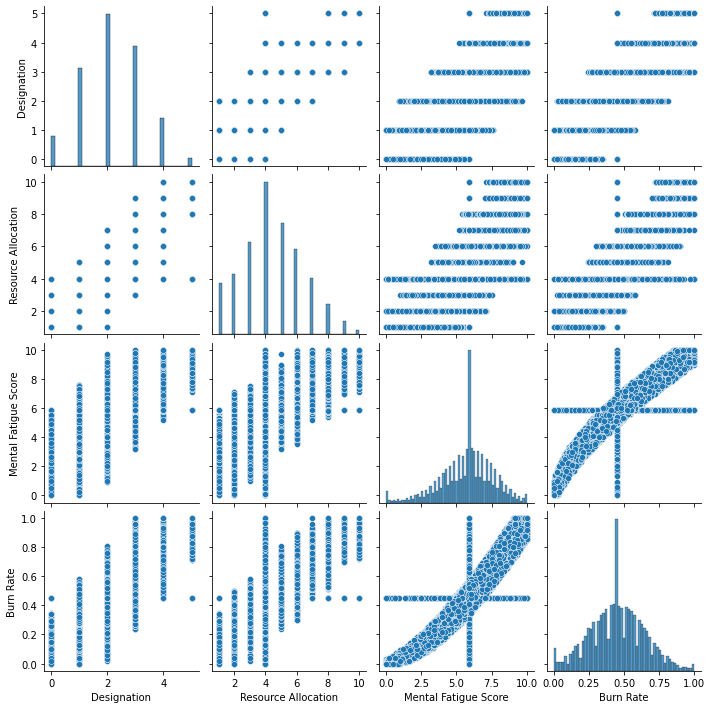

In [20]:
sns.pairplot(df)

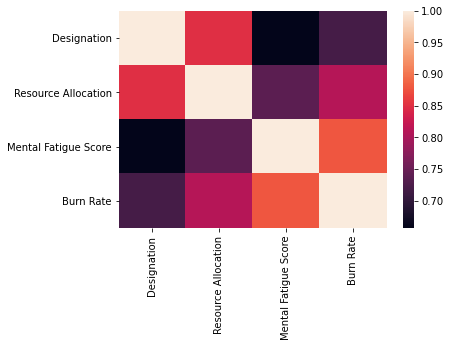

In [21]:
sns.heatmap(df.corr())

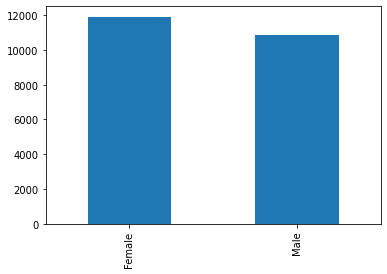

In [22]:
df['Gender'].value_counts().plot(kind='bar')

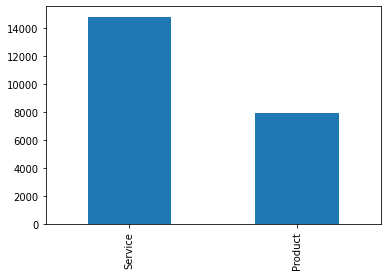

In [23]:
df['Company Type'].value_counts().plot(kind='bar')

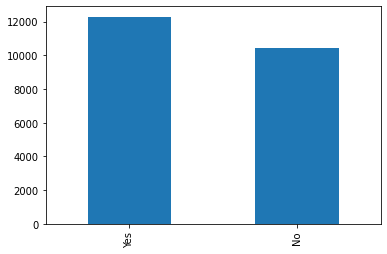

In [24]:
df['WFH Setup Available'].value_counts().plot(kind='bar')

For encoding

In [25]:

obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

Employee ID  Gender Company Type WFH Setup Available
0  fffe32003000360033003200  Female      Service                  No
1      fffe3700360033003500    Male      Service                 Yes
2  fffe31003300320037003900  Female      Product                 Yes
3  fffe32003400380032003900    Male      Service                 Yes
4  fffe31003900340031003600  Female      Service                  No

In [26]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column . 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['WFH Setup Available']=label_encoder.fit_transform(df['WFH Setup Available']) 

In [27]:
df['Company Type']=label_encoder.fit_transform(df['Company Type'])
dt['Company Type']=label_encoder.fit_transform(dt['Company Type']) 
dt['Gender']= label_encoder.fit_transform(dt['Gender']) 
dt['WFH Setup Available']=label_encoder.fit_transform(dt['WFH Setup Available']) 

In [28]:
df.shape

(22750, 9)

In [29]:
dt.shape

(12250, 8)

In [30]:
df.head()

Employee ID Date of Joining  ...  Mental Fatigue Score  Burn Rate
0  fffe32003000360033003200      2008-09-30  ...                   3.8       0.16
1      fffe3700360033003500      2008-11-30  ...                   5.0       0.36
2  fffe31003300320037003900      2008-03-10  ...                   5.8       0.49
3  fffe32003400380032003900      2008-11-03  ...                   2.6       0.20
4  fffe31003900340031003600      2008-07-24  ...                   6.9       0.52

[5 rows x 9 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  int64         
 3   Company Type          22750 non-null  int64         
 4   WFH Setup Available   22750 non-null  int64         
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   22750 non-null  float64       
 7   Mental Fatigue Score  22750 non-null  float64       
 8   Burn Rate             22750 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 1.6+ MB


In [32]:
df.corr()

Gender  Company Type  ...  Mental Fatigue Score  Burn Rate
Gender                1.000000     -0.009789  ...              0.138519   0.150973
Company Type         -0.009789      1.000000  ...              0.002347   0.004194
WFH Setup Available  -0.073296      0.005725  ...             -0.263203  -0.298597
Designation           0.113295      0.006095  ...              0.656316   0.719283
Resource Allocation   0.138321      0.006263  ...              0.737823   0.809938
Mental Fatigue Score  0.138519      0.002347  ...              1.000000   0.877903
Burn Rate             0.150973      0.004194  ...              0.877903   1.000000

[7 rows x 7 columns]

In [33]:
dt.head()

Employee ID  ... Mental Fatigue Score
0  fffe31003300390039003000  ...                  7.7
1  fffe31003300310037003800  ...                  5.2
2  fffe33003400380035003900  ...                  5.9
3      fffe3100370039003200  ...                  4.6
4  fffe32003600390036003700  ...                  6.4

[5 rows x 8 columns]

In [34]:
df=df.drop(['Employee ID','Date of Joining'],axis=1)
dt=dt.drop(['Employee ID','Date of Joining'],axis=1)

In [35]:
X=df.drop(['Burn Rate'],axis=1)
y=df['Burn Rate']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
#getting score
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(74).plot(kind='barh')
plt.show()

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_history=model.fit(X_train.values, y_train.values, epochs=10, batch_size=4, verbose=1 ,validation_split=0.20)


Epoch 1/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 2/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 3/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 4/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 5/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0059
Epoch 6/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0062
Epoch 7/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 8/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0060
Epoch 9/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 10/10
3640/3640 [==============================] - 5s 1ms/step - loss: 0.006

In [53]:
y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
from math import sqrt
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
print(mae,mse,rmse)

0.05584766276739129 0.005864110201889629 0.07657747842472765


In [55]:
ann_pred=model.predict(dt)


In [57]:
#Converting into Dataframe

pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Employee ID'],pred],axis=1)
datasets.columns=['Employee ID','Burn']
datasets.to_csv('sub.csv', index=False)

In [ ]:
import math
from math import sqrt

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math
from math import sqrt
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=sqrt(mse)
print(mae,mse,rmse)

In [ ]:
print(mae,mse,rmse)

0.056876407572671456 0.00610519010596461 0.07813571594325229
